<a href="https://colab.research.google.com/github/MarcoAPC93/Datasets/blob/main/Reto_Parte1_Equipo115_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](https://www.teahub.io/photos/full/290-2909500_tecnologico-de-monterrey-logo-vector.png)
##Ciencia de datos 
##Limpieza, análisis, visualización y kmeans

###Profesor tutor:Julio César Galindo López

###Profesor titular: María de la Paz Rico Fernández

**Marco Antonio Pérez Castellanos**-**A01793473**

**Jorge Luis Tapia Peñaloza**-**A01793013**

*Equipo 115*

####**Contexto**:

La contaminación del agua subterránea, generalmente, es ocasionada por los ambientes geológicos, debido al contacto del agua con las rocas que forman el acuífero y, dependiendo de la composición química de éstas, será el tipo de elemento químico capaz de provocar la contaminación natural. Actualmente, en México, los acuíferos se encuentran contaminados por arsénico y flúor, lo cual causa efectos severos en la salud; particularmente, este último, que se encuentra en todas las aguas, en concentraciones variables, pues tiene presencia universal en la corteza terrestre y en el agua del mar, cuyas cantidades varían entre 0.8 y 1.4 mg/L.

Dada la relevancia de este tipo de contaminación elegimos el conjunto de datos con información al respecto


####**Limpieza de base de datos.**

**Mirar en nuestros datos:**

Incluso antes de realizar cualquier limpieza o manipulación del conjunto de datos, debemos echar un vistazo a los datos para comprender con qué variables estáremos trabajando, cómo se estructuran los valores en función de la columna en la que se encuentran, y tal vez podríamos tener una idea aproximada de las inconsistencias que deberemos abordar o que serán engorrosas en la fase de análisis. Aquí, también podemos eliminar ciertas columnas que no necesitaremos según el análisis que deseemos realizar.

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 16.7 MB 22.0 MB/s 
     |████████████████████████████████| 6.3 MB 29.0 MB/s 


In [7]:
# Montamos la carpeta de Google Drive en donde esta nuestro data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Librerias a utilizar
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import folium
import geopy

from sklearn import preprocessing, cluster
import scipy

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [5]:
pd.set_option("display.max_columns",200)

In [8]:
# Lectura de la información
path = "/content/drive/MyDrive/Data sets/Calidad_Subterraneas_2020.csv"
df_completo = pd.read_csv(path,encoding='cp1252')

# Imprimiendo las primeras 5 filas del conjunto de datos
df_completo.head()

CLAVE                   SITIO           ORGANISMO_DE_CUENCA  \
0     DLAGU6            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  DLAGU6516  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2     DLAGU7              POZO COSIO       LERMA SANTIAGO PACIFICO   
3     DLAGU9      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
4   DLBAJ107      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                ESTADO        MUNICIPIO                 ACUIFERO SUBTIPO  \
0       AGUASCALIENTES         ASIENTOS       VALLE DE CHICALOTE    POZO   
1       AGUASCALIENTES   AGUASCALIENTES       VALLE DE CHICALOTE    POZO   
2       AGUASCALIENTES            COSIO  VALLE DE AGUASCALIENTES    POZO   
3       AGUASCALIENTES  RINCON DE ROMOS  VALLE DE AGUASCALIENTES    POZO   
4  BAJA CALIFORNIA SUR           LA PAZ             TODOS SANTOS    POZO   

    LONGITUD   LATITUD  PERIODO  ALC_mg/L CALIDAD_ALC  CONDUCT_mS/cm  \
0 -102.02210  22.20887     2020   229.990        Alta          940.0   
1 -102.20075  21.99958     2020   231.990        Alta          608.0   
2 -102.28801  22.36685     2020   204.920        Alta          532.0   
3 -102.29449  22.18435     2020   327.000        Alta          686.0   
4 -110.24480  23.45138     2020   309.885        Alta         1841.0   

          CALIDAD_CONDUC  SDT_mg/L SDT_M_mg/L                CALIDAD_SDT_ra  \
0  Permisible para riego       NaN      603.6            Cultivos sensibles   
1       Buena para riego       NaN      445.4          Excelente para riego   
2       Buena para riego       NaN        342          Excelente para riego   
3       Buena para riego       NaN      478.6          Excelente para riego   
4  Permisible para riego       NaN       1179  Cultivos con manejo especial   

      CALIDAD_SDT_salin FLUORUROS_mg/L      CALIDAD_FLUO  DUR_mg/L  \
0       Potable - Dulce         0.9766  Potable - Optima   213.732   
1       Potable - Dulce         0.9298  Potable - Optima  185.0514   
2       Potable - Dulce         1.8045              Alta   120.719   
3       Potable - Dulce         1.1229  Potable - Optima   199.879   
4  Ligeramente salobres         0.2343              Baja  476.9872   

      CALIDAD_DUR COLI_FEC_NMP/100_mL     CALIDAD_COLI_FEC N_NO3_mg/L  \
0  Potable - Dura                <1.1  Potable - Excelente   4.184656   
1  Potable - Dura                <1.1  Potable - Excelente    5.75011   
2  Potable - Dura                <1.1  Potable - Excelente   1.449803   
3  Potable - Dura                <1.1  Potable - Excelente   1.258597   
4  Potable - Dura                 291            Aceptable  15.672251   

             CALIDAD_N_NO3 AS_TOT_mg/L           CALIDAD_AS CD_TOT_mg/L  \
0      Potable - Excelente      0.0161       Apta como FAAP      <0.003   
1  Potable - Buena calidad      0.0134       Apta como FAAP      <0.003   
2      Potable - Excelente       0.037    No apta como FAAP      <0.003   
3      Potable - Excelente      0.0154       Apta como FAAP      <0.003   
4        No apta como FAAP       <0.01  Potable - Excelente      <0.003   

            CALIDAD_CD CR_TOT_mg/L           CALIDAD_CR HG_TOT_mg/L  \
0  Potable - Excelente      <0.005  Potable - Excelente     <0.0005   
1  Potable - Excelente      <0.005  Potable - Excelente     <0.0005   
2  Potable - Excelente      <0.005  Potable - Excelente     <0.0005   
3  Potable - Excelente       0.005  Potable - Excelente     <0.0005   
4  Potable - Excelente      <0.005  Potable - Excelente     <0.0005   

            CALIDAD_HG PB_TOT_mg/L           CALIDAD_PB MN_TOT_mg/L  \
0  Potable - Excelente      <0.005  Potable - Excelente     <0.0015   
1  Potable - Excelente      <0.005  Potable - Excelente     <0.0015   
2  Potable - Excelente      <0.005  Potable - Excelente     <0.0015   
3  Potable - Excelente      <0.005  Potable - Excelente     <0.0015   
4  Potable - Excelente      <0.005  Potable - Excelente     <0.0015   

            CALIDAD_MN FE_TOT_mg/L           CALIDAD_FE 

Al hacer una inspección de las variables contenidas en el dataset podemos ver que hay algunas que son repetitivas , el primer ejemplo de este caso es el valor numérico del contaminante y su correspondiente clasificación según el valor que tenga dicha variable , para nuestro ejercicio nos interesa más el valor númerico que cabe resaltar tiene ciertas particularidades; para valores pequeño no se muestra el valor exacto , sino una etiqueta referencia , por ejemplo '<2 mg/l' que para fines prácticos podemos igualar a valores cercanos a 0.

También hay variables que son redundantes como por ejemplo el estado y municipio , nos bastará tener la coordenadas en términos de latitud y longitud que es mucho más interesante para análisis espaciales que podamos hacer más adelante.

In [9]:
# Guardar las variables en una lista dependiendo del tipo de variable que es y si es útil o no:

# Variables categóricas que son redundantes 
cat_drop=['CLAVE','ESTADO','MUNICIPIO','PERIODO','CALIDAD_ALC','CALIDAD_CONDUC','SDT_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CONTAMINANTES','CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

# Variables categóricas que sería interesante incluir en algún modelo
cat_keep=['SITIO','ORGANISMO_DE_CUENCA','ACUIFERO','SUBTIPO']

# Variables numéricas
#num_keep=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
num_keep=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

# Quitamos aquellas variables que determinamos como redundantes 

df=df_completo.drop(columns=cat_drop)
df.head()


SITIO           ORGANISMO_DE_CUENCA  \
0            POZO SAN GIL       LERMA SANTIAGO PACIFICO   
1  POZO R013 CAÑADA HONDA       LERMA SANTIAGO PACIFICO   
2              POZO COSIO       LERMA SANTIAGO PACIFICO   
3      POZO EL SALITRILLO       LERMA SANTIAGO PACIFICO   
4      RANCHO EL TECOLOTE  PENINSULA DE BAJA CALIFORNIA   

                  ACUIFERO SUBTIPO   LONGITUD   LATITUD  ALC_mg/L  \
0       VALLE DE CHICALOTE    POZO -102.02210  22.20887   229.990   
1       VALLE DE CHICALOTE    POZO -102.20075  21.99958   231.990   
2  VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685   204.920   
3  VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435   327.000   
4             TODOS SANTOS    POZO -110.24480  23.45138   309.885   

   CONDUCT_mS/cm SDT_M_mg/L FLUORUROS_mg/L  DUR_mg/L COLI_FEC_NMP/100_mL  \
0          940.0      603.6         0.9766   213.732                <1.1   
1          608.0      445.4         0.9298  185.0514                <1.1   
2          532.0        342         1.8045   120.719                <1.1   
3          686.0      478.6         1.1229   199.879                <1.1   
4         1841.0       1179         0.2343  476.9872                 291   

  N_NO3_mg/L AS_TOT_mg/L CD_TOT_mg/L CR_TOT_mg/L HG_TOT_mg/L PB_TOT_mg/L  \
0   4.184656      0.0161      <0.003      <0.005     <0.0005      <0.005   
1    5.75011      0.0134      <0.003      <0.005     <0.0005      <0.005   
2   1.449803       0.037      <0.003      <0.005     <0.0005      <0.005   
3   1.258597      0.0154      <0.003       0.005     <0.0005      <0.005   
4  15.672251       <0.01      <0.003      <0.005     <0.0005      <0.005   

  MN_TOT_mg/L FE_TOT_mg/L SEMAFORO  
0     <0.0015      0.0891    Verde  
1     <0.0015      <0.025    Verde  
2     <0.0015      <0.025     Rojo  
3     <0.0015      <0.025    Verde  
4     <0.0015      <0.025     Rojo

In [10]:
# Haremos la sustitución para aquellos valores que aparecen en el formato menor que determinado valor
# Le damos un valor del 50% del valor del limite establecido
# Convertimos en numérico

df['SDT_M_mg/L'] = pd.to_numeric(df['SDT_M_mg/L'].replace(['<25'],12.5))
df['FLUORUROS_mg/L'] = pd.to_numeric(df['FLUORUROS_mg/L'].replace(['<0.2'],0.10))
df['DUR_mg/L'] = pd.to_numeric(df['DUR_mg/L'].replace(['<20'],10))
df['COLI_FEC_NMP/100_mL'] = pd.to_numeric(df['COLI_FEC_NMP/100_mL'].replace(['<1.1'],0.55))
df['N_NO3_mg/L'] = pd.to_numeric(df['N_NO3_mg/L'].replace(['<0.02'],0.01))
df['AS_TOT_mg/L'] = pd.to_numeric(df['AS_TOT_mg/L'].replace(['<0.01'],0.005))
df['CD_TOT_mg/L'] = pd.to_numeric(df['CD_TOT_mg/L'].replace(['<0.003'],0.0015))
df['CR_TOT_mg/L'] = pd.to_numeric(df['CR_TOT_mg/L'].replace(['<0.005'],0.0025))
df['HG_TOT_mg/L'] = pd.to_numeric(df['HG_TOT_mg/L'].replace(['<0.0005'],0.00025))
df['PB_TOT_mg/L'] = pd.to_numeric(df['PB_TOT_mg/L'].replace(['<0.005'],0.0025))
df['MN_TOT_mg/L'] = pd.to_numeric(df['MN_TOT_mg/L'].replace(['<0.0015'],0.00075))
df['FE_TOT_mg/L'] = pd.to_numeric(df['FE_TOT_mg/L'].replace(['<0.025'],0.0125))

In [11]:
# Verificación del tipo de datos en cada columna
print("Tipos de datos de columnas: ")
print(df.dtypes)

Tipos de datos de columnas: 
SITIO                   object
ORGANISMO_DE_CUENCA     object
ACUIFERO                object
SUBTIPO                 object
LONGITUD               float64
LATITUD                float64
ALC_mg/L               float64
CONDUCT_mS/cm          float64
SDT_M_mg/L             float64
FLUORUROS_mg/L         float64
DUR_mg/L               float64
COLI_FEC_NMP/100_mL    float64
N_NO3_mg/L             float64
AS_TOT_mg/L            float64
CD_TOT_mg/L            float64
CR_TOT_mg/L            float64
HG_TOT_mg/L            float64
PB_TOT_mg/L            float64
MN_TOT_mg/L            float64
FE_TOT_mg/L            float64
SEMAFORO                object
dtype: object


In [12]:
# Examinando los valores perdidos
print("Distribución de valores perdidos: ")
print(df.isnull().mean())
print("")

Distribución de valores perdidos: 
SITIO                  0.000000
ORGANISMO_DE_CUENCA    0.000000
ACUIFERO               0.000000
SUBTIPO                0.000000
LONGITUD               0.000000
LATITUD                0.000000
ALC_mg/L               0.003745
CONDUCT_mS/cm          0.005618
SDT_M_mg/L             0.001873
FLUORUROS_mg/L         0.000000
DUR_mg/L               0.000936
COLI_FEC_NMP/100_mL    0.000000
N_NO3_mg/L             0.000936
AS_TOT_mg/L            0.000000
CD_TOT_mg/L            0.000000
CR_TOT_mg/L            0.000000
HG_TOT_mg/L            0.000000
PB_TOT_mg/L            0.000000
MN_TOT_mg/L            0.000000
FE_TOT_mg/L            0.000000
SEMAFORO               0.000000
dtype: float64



In [13]:
# Hacemos la imputación a través de la mediana que es un estimador robusto 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[num_keep])
  
df[num_keep]= imputer.transform(df[num_keep])

# Y verificamos que ya no tengamos valores perdidos 
print("Distribución de valores perdidos: ")
print(df.isnull().mean())
print("")

Distribución de valores perdidos: 
SITIO                  0.0
ORGANISMO_DE_CUENCA    0.0
ACUIFERO               0.0
SUBTIPO                0.0
LONGITUD               0.0
LATITUD                0.0
ALC_mg/L               0.0
CONDUCT_mS/cm          0.0
SDT_M_mg/L             0.0
FLUORUROS_mg/L         0.0
DUR_mg/L               0.0
COLI_FEC_NMP/100_mL    0.0
N_NO3_mg/L             0.0
AS_TOT_mg/L            0.0
CD_TOT_mg/L            0.0
CR_TOT_mg/L            0.0
HG_TOT_mg/L            0.0
PB_TOT_mg/L            0.0
MN_TOT_mg/L            0.0
FE_TOT_mg/L            0.0
SEMAFORO               0.0
dtype: float64



In [14]:
# Función para obtener valores únicos de una columna
def getUnique(data):
    unique_values = set()
    for value in data:
        if type(value) is float:
            unique_values.add(None)
        else:
            values = value.split(", ")
            for i in values:
                unique_values.add(i)
    return list(unique_values)

####**Explorar  cada dato (auxiliate de describe(), mean(), plot, boxplot de pandas):**
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos

* Identificar correlaciones

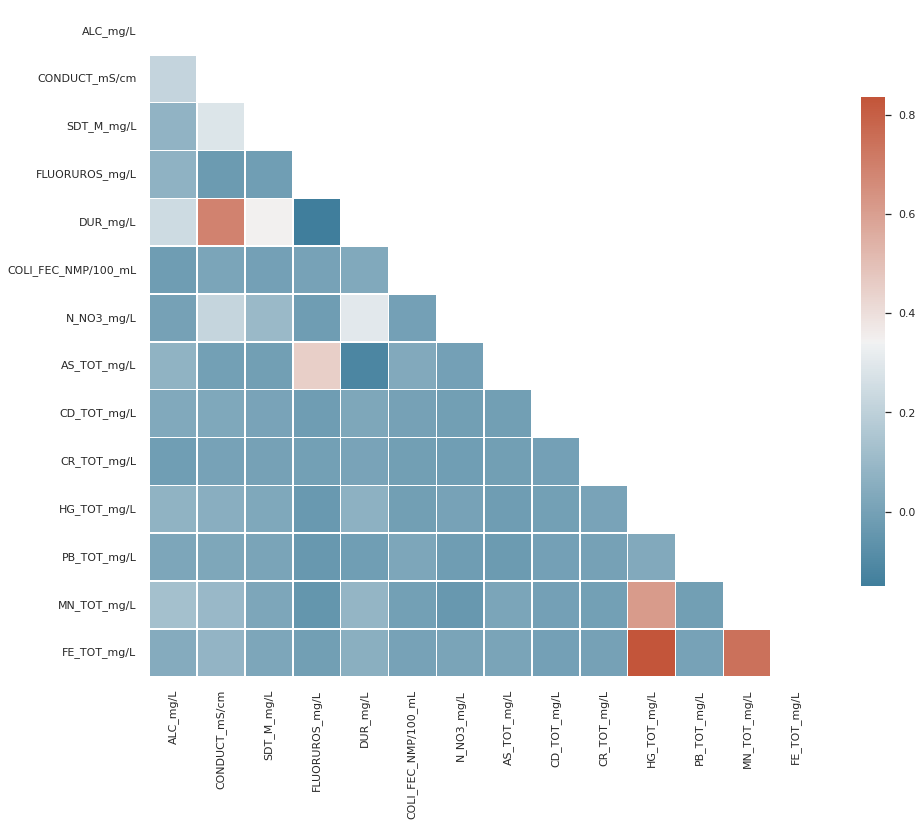

In [15]:
sns.set_theme(style="white")
corr = df[num_keep].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})

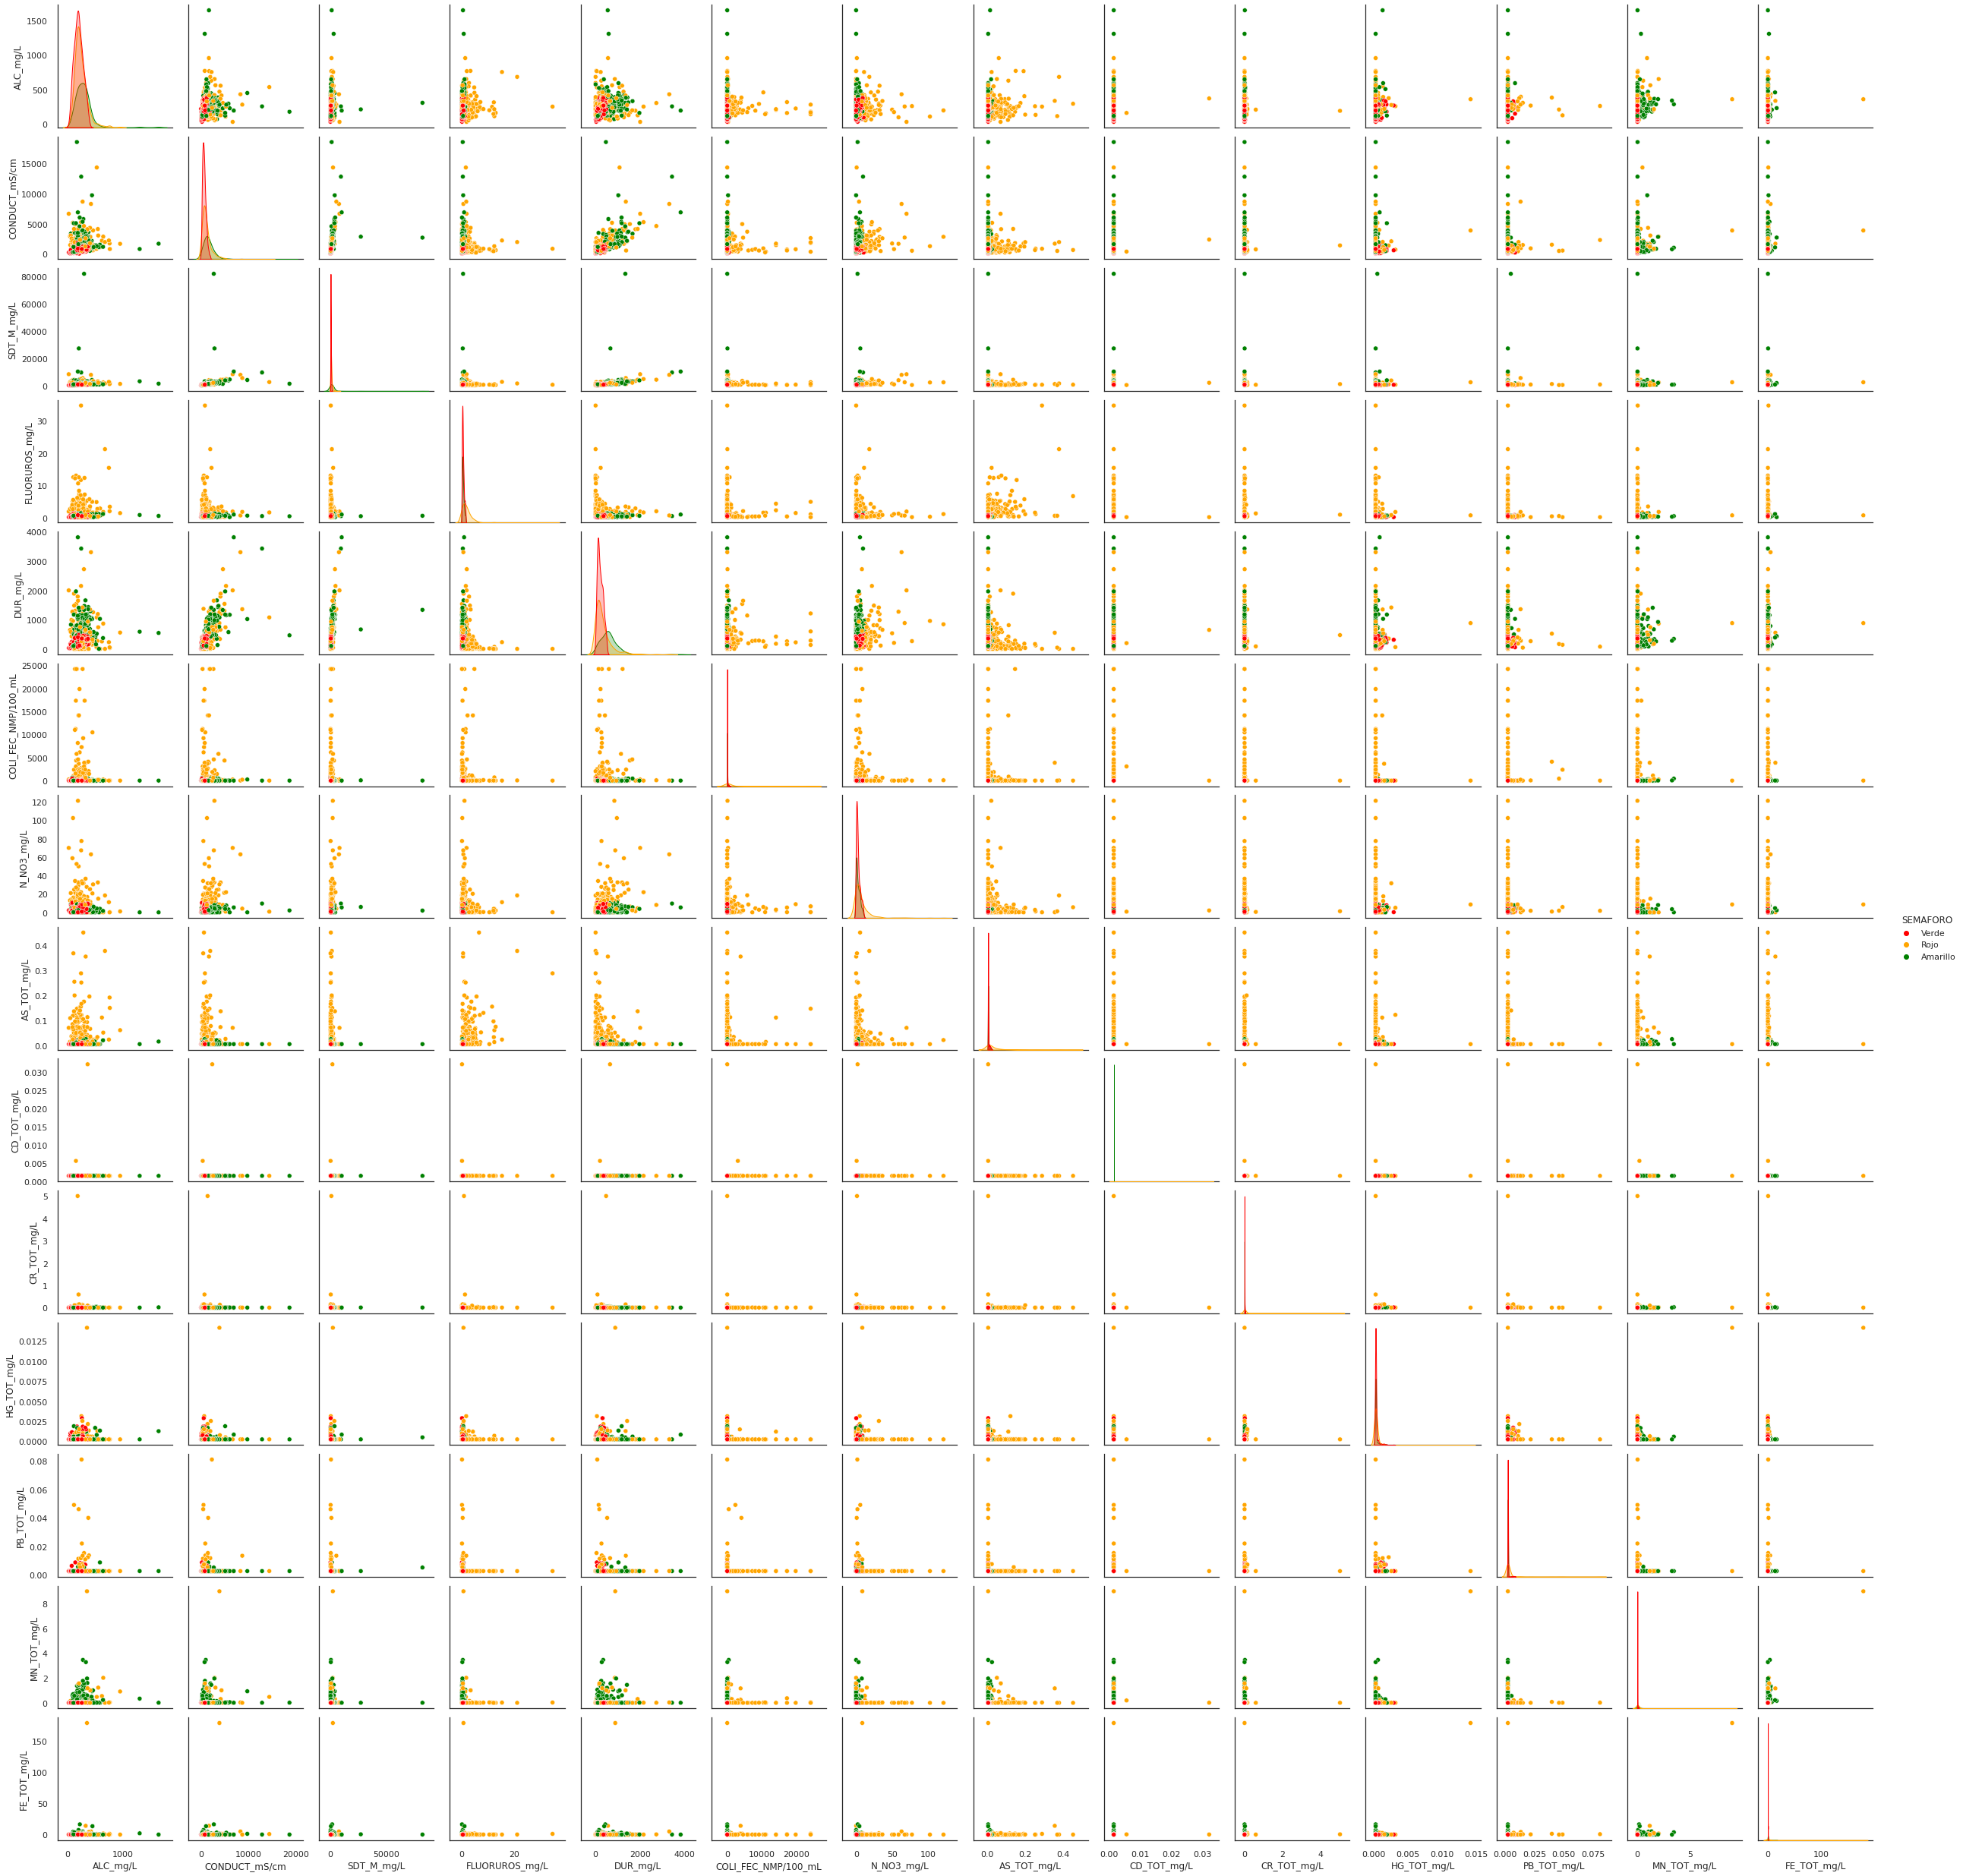

In [17]:
# Hacemos un gráfico Pair-Plot para visualizar y tratar de entender si existe alguna relación entre las variables del data set

num_keepPP=['SEMAFORO','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
sns.pairplot(df[num_keepPP], diag_kind='kde',hue = "SEMAFORO",palette = ["red","orange","green"])

* Identificar medidas de dispersión, máximo, mínimo 

In [18]:
df[num_keepPP].describe(percentiles = np.arange(.1,1,.1))

ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.558455    1137.133052    895.442481        1.060431   347.598557   
std     116.661485    1242.292889   2748.995031        1.931508   359.740022   
min      26.640000      50.400000     12.500000        0.100000    10.000000   
10%     116.510000     333.700000    242.540000        0.100000    68.020170   
20%     150.976000     448.400000    306.440000        0.236880   102.415540   
30%     176.580000     556.200000    375.060000        0.301610   138.904600   
40%     195.360000     675.800000    457.760000        0.394840   184.437600   
50%     215.527500     815.000000    550.400000        0.503500   245.335800   
60%     242.084000     994.200000    660.400000        0.689500   317.139200   
70%     274.377000    1203.900000    817.000000        0.951340   389.844000   
80%     309.420000    1471.200000   1073.600000        1.399700   524.546400   
90%     357.420000    2167.800000   1627.580000        2.429450   746.070000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.110815     4.317054     0.015802     0.001532   
std            2052.522624     8.341818     0.036300     0.000945   
min               0.550000     0.010000     0.005000     0.001500   
10%               0.550000     0.057088     0.005000     0.001500   
20%               0.550000     0.337504     0.005000     0.001500   
30%               0.550000     0.853713     0.005000     0.001500   
40%               0.550000     1.416165     0.005000     0.001500   
50%               0.550000     2.080932     0.005000     0.001500   
60%               0.550000     2.967577     0.005000     0.001500   
70%               4.000000     4.212760     0.005000     0.001500   
80%              40.000000     5.845212     0.013400     0.001500   
90%             240.300000     9.109117     0.032730     0.001500   
max           24196.000000   121.007813     0.452200     0.032110   

       CR_TOT_mg/L  HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
count  1068.000000  1068.000000  1068.000000  1068.000000  1068.000000  
mean      0.011276     0.000331     0.002852     0.072095     0.405694  
std       0.154502     0.000500     0.003483     0.376585     5.538304  
min       0.002500     0.000250     0.002500     0.000750     0.012500  
10%       0.002500     0.000250     0.002500     0.000750     0.012500  
20%       0.002500     0.000250     0.002500     0.000750     0.012500  
30%       0.002500     0.000250     0.002500     0.000750     0.012500  
40%       0.002500     0.000250     0.002500     0.000750     0.029440  
50%       0.002500     0.000250     0.002500     0.000750     0.046960  
60%       0.002500     0.000250     0.002500     0.002784     0.072400  
70%       0.002500     0.000250     0.002500     0.006400     0.126980  
80%       0.004000     0.000250     0.002500     0.015306     0.219204  
90%       0.012459     0.000250     0.002500     0.074143     0.384950  
max       5.003200     0.014150     0.080900     8.982000   178.615000

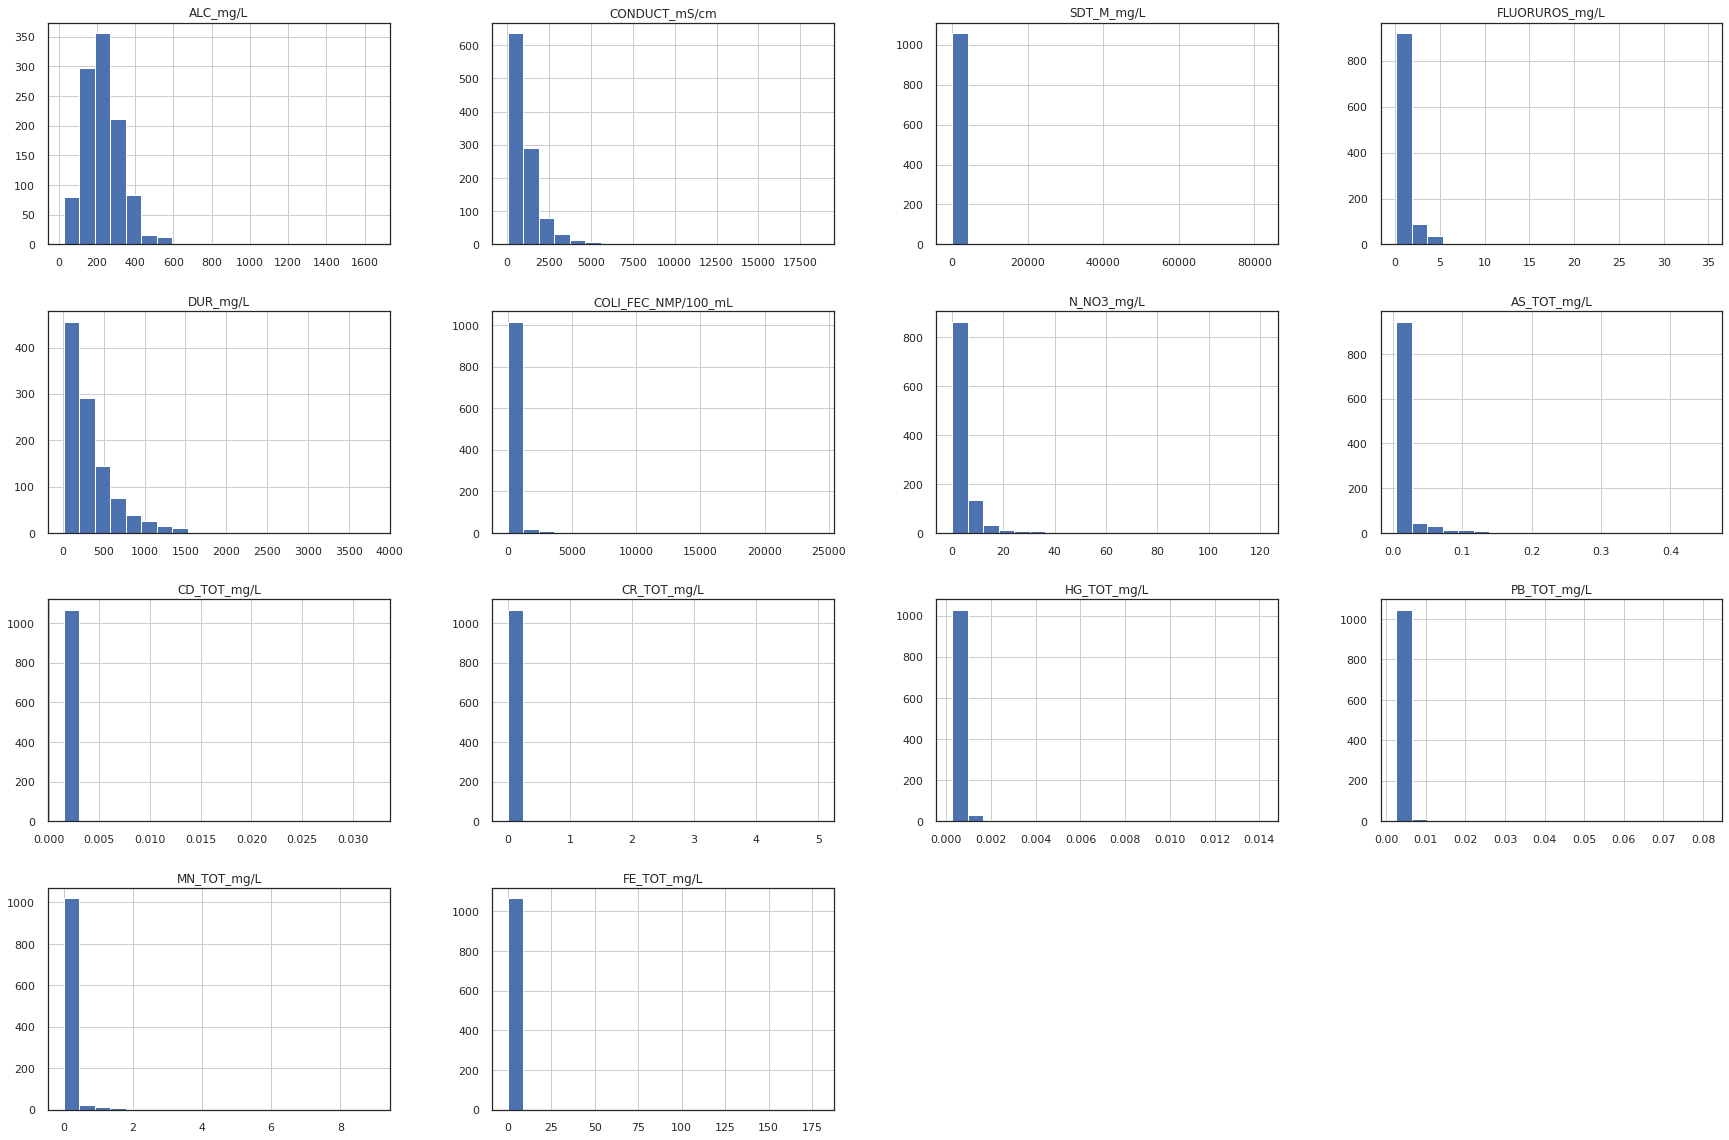

In [21]:
df[num_keepPP].hist(figsize = (30,20), bins = 20);

* Identificar medidas de posición no centrales , los cuartiles , outliers. 

Text(0.5, 1.0, 'Box plot variables de calidad del agua')

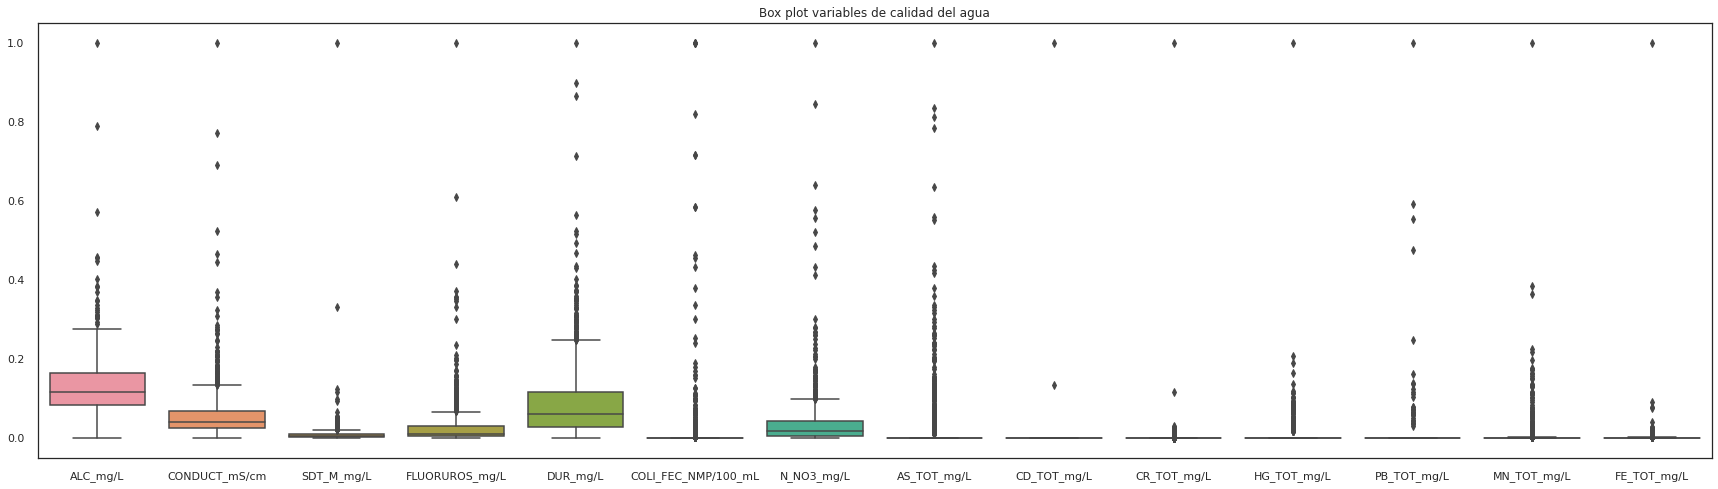

In [22]:
plt.figure(figsize = (30,8))
sns.boxplot(data=((df[num_keepPP[1:]]-df[num_keepPP[1:]].min())/(df[num_keepPP[1:]].max()-df[num_keepPP[1:]].min())))
plt.title("Box plot variables de calidad del agua")

####**Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.**

Antes de hacer el análisis de K-means ubicaremos gráficamente la información que tenemos en el dataset junta a la variable de salida y usando como tamaño una variable cualquiera de contaminantes

In [23]:
city = "Mexico"
## Obtener locación
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## Mantener la latitud y la longitud solamente
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

México
[lat, long]: [23.6585116, -102.0077097]


In [25]:
x, y = "LATITUD", "LONGITUD"
color = "SEMAFORO"
size = "CONDUCT_mS/cm"
popup = "SITIO"
data = df.copy()

## Crear columna de color
lst_colors=["orange","red","green"]
lst_elements = sorted(list(df[color].unique()))
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## Crear columna de tamaño (a escala)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## Inicializar el mapa con la ubicación inicial
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=5)
## Agregar puntos
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## Agregar legenda html
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

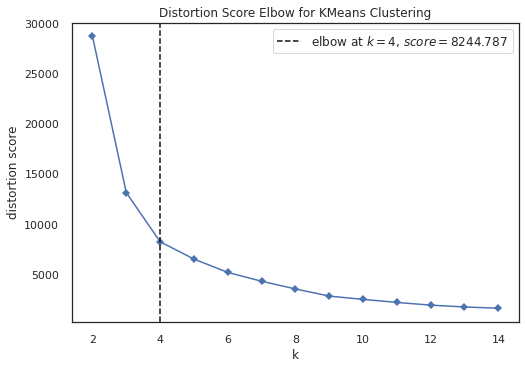

In [26]:
X = df[["LATITUD","LONGITUD"]]

# Crear una instancia del modelo de agrupamiento y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,15),timings=False)

visualizer.fit(X)        # Ajustar los datos al visualizador
visualizer.show()    

Podemos probar con k = 4 para que el algoritmo K-Means encuentre 4 centroides teóricos. Además, identificaremos los centroides reales (la observación más cercana al centro del grupo).

In [27]:
k = 4
#model = cluster.KMeans(n_clusters=k, init='k-means++')
model = KMeans(n_clusters=k).fit(X)
X = df[["LATITUD","LONGITUD"]]
## Clustering
df_X = X.copy()
df_X["CLUSTER"] = model.fit_predict(X)

## Encontrar centroides reales
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_X.drop("CLUSTER", axis=1).values)
df_X["CENTROIDES"] = 0
for i in closest:
    df_X["CENTROIDES"].iloc[i] = 1

## Agregar información de los clusters al conjunto de datos original

df[["CLUSTER","CENTROIDES"]] = df_X[["CLUSTER","CENTROIDES"]]
df.sample(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


SITIO          ORGANISMO_DE_CUENCA  \
171           POZO NO. 1125 JAVIER PARRA GODINEZ      LERMA SANTIAGO PACIFICO   
1010  POZO 3 DEL SISTEMA DE AGUA POTABLE DE UMAN         PENINSULA DE YUCATAN   
490                                  LA MEZCLITA                  GOLFO NORTE   
649                           POZO 47 LAS PALMAS  CUENCAS CENTRALES DEL NORTE   
664                       POZO 4101 SAN FERNANDO  CUENCAS CENTRALES DEL NORTE   

                  ACUIFERO SUBTIPO    LONGITUD   LATITUD  ALC_mg/L  \
171              EL COLOMO    POZO -104.205807  19.03032   170.040   
1010  PENINSULA DE YUCATAN    POZO  -89.758420  20.87508   285.550   
490              RIO VERDE    POZO -100.077820  21.94226   239.805   
649               CEBALLOS    POZO -104.189660  26.49838    77.350   
664           VILLA JUAREZ    POZO -103.535960  25.50964   161.330   

      CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
171           470.0       290.2          0.2065  160.7202   
1010         1097.0       719.0          0.1000  524.9800   
490          1641.0      1138.0          1.3636  851.0560   
649          2580.0      1829.0          3.0196  440.4924   
664           364.0       239.0          0.5113  129.9651   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
171                  0.55    1.471180       0.0050       0.0015       0.0025   
1010                 0.55    3.102100       0.0050       0.0015       0.0025   
490                  0.55    0.567393       0.0050       0.0015       0.0025   
649                  0.55   11.912798       0.0154       0.0015       0.0025   
664                  0.55    0.445932       0.0111       0.0015       0.0025   

      HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  SEMAFORO  CLUSTER  \
171       0.00025       0.0025      0.01220       0.0125     Verde        1   
1010      0.00025       0.0025      0.00075       0.1819  Amarillo        3   
490       0.00025       0.0025      0.00075       0.0319  Amarillo        1   
649       0.00025       0.0025      0.00380       0.1027      Rojo        0   
664       0.00025       0.0025      0.00075       0.0125     Verde        0   

      CENTROIDES  
171            0  
1010           0  
490            0  
649            0  
664            0

####**Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

In [28]:
lst_colors = ["CadetBlue", "IndianRed","LightSalmon","SteelBlue"]

In [29]:
x, y = "LATITUD", "LONGITUD"
color = "CLUSTER"
size = "ALC_mg/L"
popup = "SITIO"
marker = "CENTROIDES"
data = df.copy()
## Crear columna de color
lst_elements = sorted(list(df[color].unique()))
# lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
#               range(len(lst_elements))]

data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## Crear columna de tamaño (a escala)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## Inicializar el mapa con la ubicación inicial
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=5)
## Agregar puntos
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## Agregar legenda html
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i+1)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## Agregar marcador de centroide
lst_elements = sorted(list(df[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[marker], draggable=False,          
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

In [30]:
df["n"] = 1

In [31]:
data_pivot = df.pivot_table(index = ["CLUSTER"], columns ="SEMAFORO", values = "n", aggfunc = "sum", margins = True).apply(lambda x: x/x["All"],axis = 1)
data_pivot.drop(columns = ["All"], inplace = True)
data_pivot = data_pivot[["Rojo", "Amarillo", "Verde"]]
data_pivot.style.background_gradient()

In [32]:
centroids = model.cluster_centers_
cen_y = [i[0] for i in centroids] 
cen_x = [i[1] for i in centroids]

In [33]:
df["c"] = df["SEMAFORO"].replace({"Verde": "green", "Amarillo": "yellow", "Rojo": "red"})

In [34]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")


Mostramos de manera gráfica la distribución de las distintas escalas del semáforo en cada uno de los clusters 

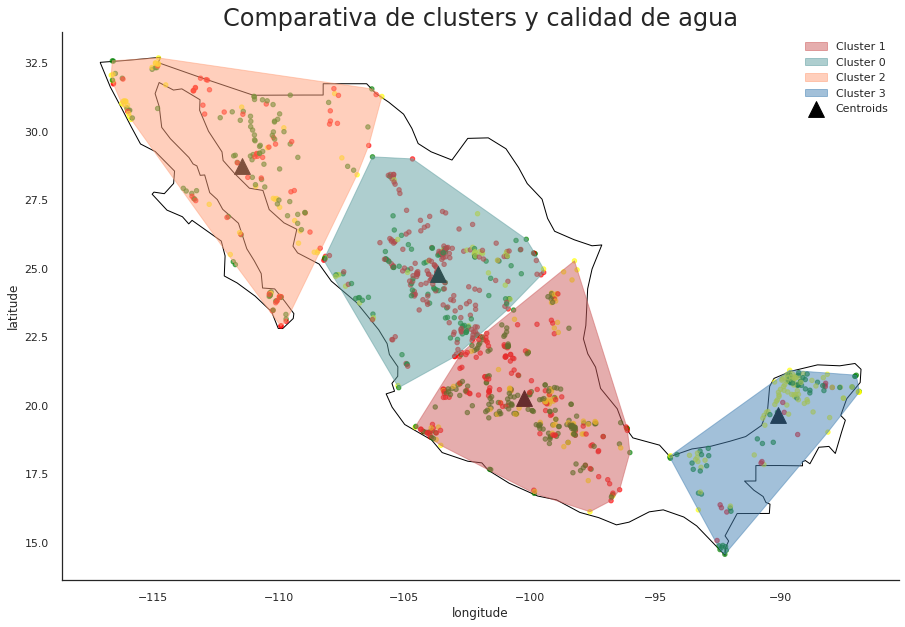

In [35]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(15,15))

world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black',color='white')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.scatter(df.LONGITUD,df.LATITUD,  c=df.c, alpha = 0.6, s=20)
plt.scatter(cen_x, cen_y, marker='^', c="black", s=250, label = "Centroids")

for i in df.CLUSTER.unique():
    points = df[df.CLUSTER == i][["LONGITUD","LATITUD"]].values
    hull = ConvexHull(points)

    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.5, c=lst_colors[i], label = f"Cluster {i}")
plt.legend()
plt.title("Comparativa de clusters y calidad de agua", fontdict = {"size": 24});

Notamos que para el cluster 0 y 3 no hay mucha diferencia en cuanto a calidad final que es representada por el semaforo. 
Sin embargo para el cluster 1 y 2 observamos que si hay una clara tendencia.
En el caso del 1 en su mayoria son aguas en color rojo y en para el cluster 2 en su mayoria son de semaforo amarillo.

Observaciones:
* El cluster 0 tiene como clase mayoritaria semáforo=rojo es decir tiene más sitios marcados con semáforo rojo vs el resto de clases.Si comparamos la distribución de la clase mayoritaria en este cluster vs la el dataset completo vemos que existe un index de 159 ( hacemos un cociente entre el % de la clase en el cluster y % de la clase en el data set completo y multiplicamos por 100)
* En el cluster 3 ocurre un fenómeno similar al del cluster 0 pero con semáforo=amarillo como clase mayoritaria y con un index de 226.

* Para los clusters 1 y 2 vemos una distribución de clases similar al del dataset completo , por lo cual no podemos encontrar alguna tendencia destacada

En conclusión solo la mitad de los clusters nos ayudan a determinar de alguna forma la calidad del agua , por lo que este fenómeno puede tener algún factor geográfico implicito lo cual tiene sentido por las causas mismas de la contaminación de aguas subterraneas , mucha de ella causada por determinado tipo de rocas , que definitivamente esta ligado a la ubicación. Tan solo a manera de exploración veamos si aumentar k nos ayuda a mejorar la relación entre la calidad del agua y cada cluster.




In [37]:
k = 8
#model = cluster.KMeans(n_clusters=k, init='k-means++')
model = KMeans(n_clusters=k).fit(X)
X = df[["LATITUD","LONGITUD"]]
## Clustering
df_X = X.copy()
df_X["CLUSTER"] = model.fit_predict(X)

## Encontrar centroides reales
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_X.drop("CLUSTER", axis=1).values)
df_X["CENTROIDES"] = 0
for i in closest:
    df_X["CENTROIDES"].iloc[i] = 1

## Agregar información de los clusters al conjunto de datos original

df[["CLUSTER","CENTROIDES"]] = df_X[["CLUSTER","CENTROIDES"]]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [38]:
data_pivot = df.pivot_table(index = ["CLUSTER"], columns ="SEMAFORO", values = "n", aggfunc = "sum", margins = True).apply(lambda x: x/x["All"],axis = 1)
data_pivot.drop(columns = ["All"], inplace = True)
data_pivot = data_pivot[["Rojo", "Amarillo", "Verde"]]
data_pivot.style.background_gradient()

Duplicando el valor de k , nos encontramos algunos cluster que de manera más similar al ejercicio con k=4 hay algunas clases mayoritarias que sobre indexan vs la población total , sin embargo dado el espíritu de k-means y la ganancia en clasificación es marginal , elegimos el caso óptimo para k=4 determinado por el método del codo

###**Referencias:**

* Corporativa, I. (2021, April 22). ¿Qué son las aguas subterráneas y por qué preocupa su nivel de contaminación? Iberdrola. https://www.iberdrola.com/sostenibilidad/aguas-subterraneas

* Revista Digital Universitaria. (n.d.). Unam.Mx. Retrieved November 17, 2022, from https://www.revista.unam.mx/vol.10/num8/art48/int48-1.htm

* Rivera, K. (2015, February 11). México enfrenta contaminación del agua subterránea –. Agua.org.mx. https://agua.org.mx/mexico-enfrenta-contaminacion-del-agua-subterranea/